# Assignment1

### 3.1 Pseudonymisation

Imports

In [417]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [418]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_1151/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 5 NaN and columns with more than 500

In [419]:
df=df.dropna(thresh=23)
df = df.dropna(axis=1, thresh=len(df) - 500)

Display

In [420]:
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong
3,5164.0,Abo Brandon,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|
12,11416.0,Mike Abgarian,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|
20,21053.0,Douglas Acker,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
21,21269.0,Erik Acevedo,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|
22,21685.0,Richard Ablett,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|
422421,385519.0,Dru Miller,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
422518,92194.0,Robert North,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN
422754,539852.0,Ted Worden,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|


In [421]:
df.apply(pd.Series.nunique)

athlete_id    21747
name          21409
gender            2
age              43
height           58
candj           323
snatch          286
deadlift        431
backsq          404
train            74
experience       68
howlong          25
dtype: int64

Text(0.5, 1.0, 'Cardinality')

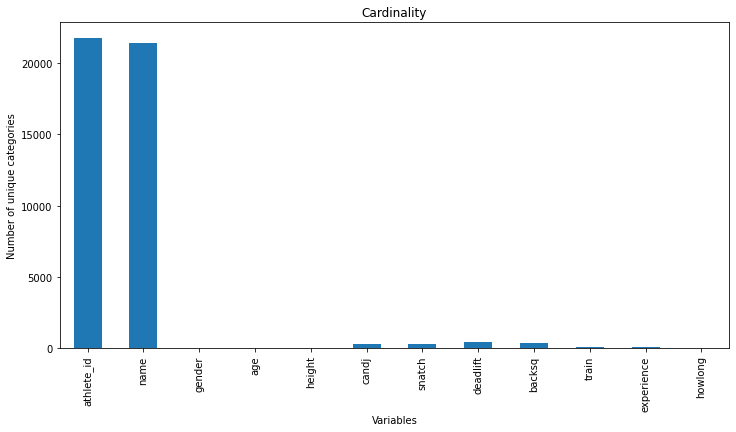

In [422]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [423]:
an = anonymize(df)

display name column and corresponding fake name column

In [424]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Megan Tucker
12,Mike Abgarian,Anthony Thomas
20,Douglas Acker,Tina Fisher
21,Erik Acevedo,Glen Walker
22,Richard Ablett,Mr Damien Lambert
...,...,...
422278,Carley Feil,Roy Parker
422421,Dru Miller,Mr Samuel Wallace
422518,Robert North,Helen Warren
422754,Ted Worden,Mr Callum Marsden


display name athlete_id and corresponding fake id column

In [425]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,DBNX36088487996663
12,11416,HEDB52266883782899
20,21053,XWMS30639528054345
21,21269,KXBA16328529447275
22,21685,ZBWW16357094467819
...,...,...
422278,553695,MZDT86545359877275
422421,385519,OVZS19698289266255
422518,92194,FIIM02362970674676
422754,539852,AKCX82503102567730


### 3.2 Randomisation

In [426]:
from faker import Faker
import random

#### Generate two lists of meaningful names for first and last names

Functions to generate names

Generate 21747(size of data set) random unique first and last names

In [427]:
fake = Faker()

first_names = set()
last_names = set()
while len(first_names) < 690 and len(last_names) < 1000:
    first_names.add(fake.first_name())
    last_names.add(fake.last_name())

first_names_list=list(first_names)
last_names_list=list(last_names)


generate a random name combination

In [428]:
def generate_random_name():
    return f"{random.choice(first_names_list)} {random.choice(last_names_list)}"

In [429]:
num_unique_names = 21747  

random_names = set()
while len(random_names) < num_unique_names:
    random_names.add(generate_random_name())

generate lookup table

In [430]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(random_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))

#get first 8 elements
list(lookup_table.items())[:8]

[('Hayden Avery', 'Abo Brandon'),
 ('Sheila Ramirez', 'Mike Abgarian'),
 ('Mia Hensley', 'Douglas Acker'),
 ('Levi Velez', 'Erik Acevedo'),
 ('Bryan Hoover', 'Richard Ablett'),
 ('Katrina Lowery', 'Joe Abruzzo'),
 ('Grace Gutierrez', 'Jerry Abadom'),
 ('Tanner Rhodes', 'Brigham Abbott')]

replace real names with random ones

In [431]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Hayden Avery,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Megan Tucker,DBNX36088487996663
12,11416,Sheila Ramirez,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Anthony Thomas,HEDB52266883782899
20,21053,Mia Hensley,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Tina Fisher,XWMS30639528054345
21,21269,Levi Velez,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Glen Walker,KXBA16328529447275
22,21685,Bryan Hoover,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Damien Lambert,ZBWW16357094467819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Andrew Choi,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Roy Parker,MZDT86545359877275
422421,385519,Cassie Kemp,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Samuel Wallace,OVZS19698289266255
422518,92194,Helen Schroeder,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Helen Warren,FIIM02362970674676
422754,539852,Gene Eaton,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Mr Callum Marsden,AKCX82503102567730


try getting the original name from lookup table

In [432]:
lookup_table.get('Curtis Mayer')

### 3.3 Aggregation 

minimum age present is 14 and maximum 56

In [433]:
age_labels = ['10-20', '21-31', '32-42', '43-53', '54-64']
age_bins = [10, 20, 31, 42, 53,64]

In [434]:
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Hayden Avery,Male,32-42,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Megan Tucker,DBNX36088487996663
12,11416,Sheila Ramirez,Male,32-42,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Anthony Thomas,HEDB52266883782899
20,21053,Mia Hensley,Male,43-53,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Tina Fisher,XWMS30639528054345
21,21269,Levi Velez,Male,21-31,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Glen Walker,KXBA16328529447275
22,21685,Bryan Hoover,Male,21-31,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Damien Lambert,ZBWW16357094467819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Andrew Choi,Female,21-31,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Roy Parker,MZDT86545359877275
422421,385519,Cassie Kemp,Male,21-31,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Samuel Wallace,OVZS19698289266255
422518,92194,Helen Schroeder,Male,32-42,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Helen Warren,FIIM02362970674676
422754,539852,Gene Eaton,Male,21-31,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Mr Callum Marsden,AKCX82503102567730


3.4 Perturbation

In [435]:
import numpy as np

Add Gaussian noise to snatch attribute

In [436]:
df_with_noise = df.copy()
std_dev = df_with_noise["snatch"].std()
noise = np.random.normal(0, std_dev, len(df_with_noise))
df_with_noise["snatch"] += noise
display(df_with_noise)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Hayden Avery,Male,32-42,67.0,245.0,71.093416,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Megan Tucker,DBNX36088487996663
12,11416,Sheila Ramirez,Male,32-42,65.0,290.0,143.882388,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Anthony Thomas,HEDB52266883782899
20,21053,Mia Hensley,Male,43-53,72.0,325.0,200.967532,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Tina Fisher,XWMS30639528054345
21,21269,Levi Velez,Male,21-31,71.0,235.0,160.729866,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Glen Walker,KXBA16328529447275
22,21685,Bryan Hoover,Male,21-31,70.0,187.0,-7.610789,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Damien Lambert,ZBWW16357094467819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Andrew Choi,Female,21-31,67.0,112.0,59.076118,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Roy Parker,MZDT86545359877275
422421,385519,Cassie Kemp,Male,21-31,70.0,200.0,158.437354,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Mr Samuel Wallace,OVZS19698289266255
422518,92194,Helen Schroeder,Male,32-42,70.0,185.0,124.069570,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Helen Warren,FIIM02362970674676
422754,539852,Gene Eaton,Male,21-31,69.0,185.0,151.584184,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Mr Callum Marsden,AKCX82503102567730


In [437]:
print(df['snatch'].describe())
print("---------With noise ----------")
print(df_with_noise['snatch'].describe())



count    21327.000000
mean       164.308201
std         57.078105
min          0.000000
25%        132.000000
50%        165.000000
75%        195.000000
max       2225.000000
Name: snatch, dtype: float64
---------With noise ----------
count    21327.000000
mean       164.292454
std         80.569036
min       -179.266994
25%        112.716467
50%        164.109028
75%        215.099124
max       2158.548755
Name: snatch, dtype: float64


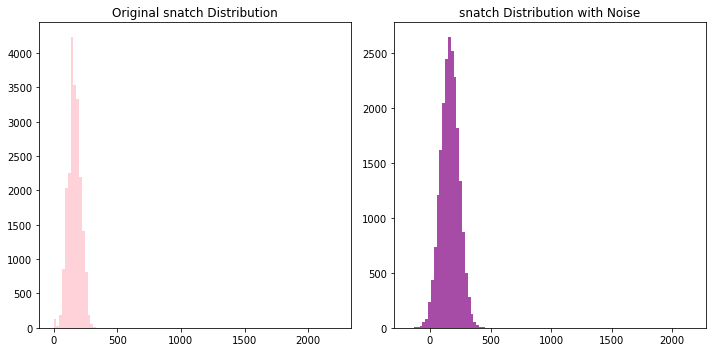

In [438]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['snatch'], bins=100, color='pink', alpha=0.7)
plt.title('Original snatch Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_with_noise['snatch'], bins=100, color='purple', alpha=0.7)
plt.title('snatch Distribution with Noise')

plt.tight_layout()
plt.show()

# 3.5 Data Analysis

In [439]:
from scipy.stats import wasserstein_distance

mean squared error function

In [440]:
def analyze_information_loss(original_data, noisy_data):
     squared_error = (original_data - noisy_data) ** 2
     return np.sum(squared_error) / original_data.size

Total Variation Distance as a similarity measure

In [458]:
def total_variation_distance(original_data, noisy_data):   
    return 0.5 * np.sum(np.abs(original_data - noisy_data))


Results

In [460]:
analyze_information_loss(df['snatch'],df_with_noise['snatch'])

3222.291233389172

In [459]:
total_variation_distance(df['snatch'],df_with_noise['snatch'])

487147.49279980507